In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
from tensorflow.keras.utils import img_to_array, load_img
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import os

# Carga escalado, resize y aumento de los datos

 Asignación de las rutas y cargar las imagenes de los datasets desde directorios de train y test

In [20]:
# Rutas
train_dir = 'dataset/train'
test_dir = 'dataset/test'

# Preprocesamiento + aumento de datos para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalización
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.15,    
    horizontal_flip=True,
    brightness_range=[0.3, 1.6],
    validation_split=0.10
)


# Carga de datos
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# Solo normalización para test
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 4009 images belonging to 6 classes.
Found 442 images belonging to 6 classes.
Found 945 images belonging to 6 classes.


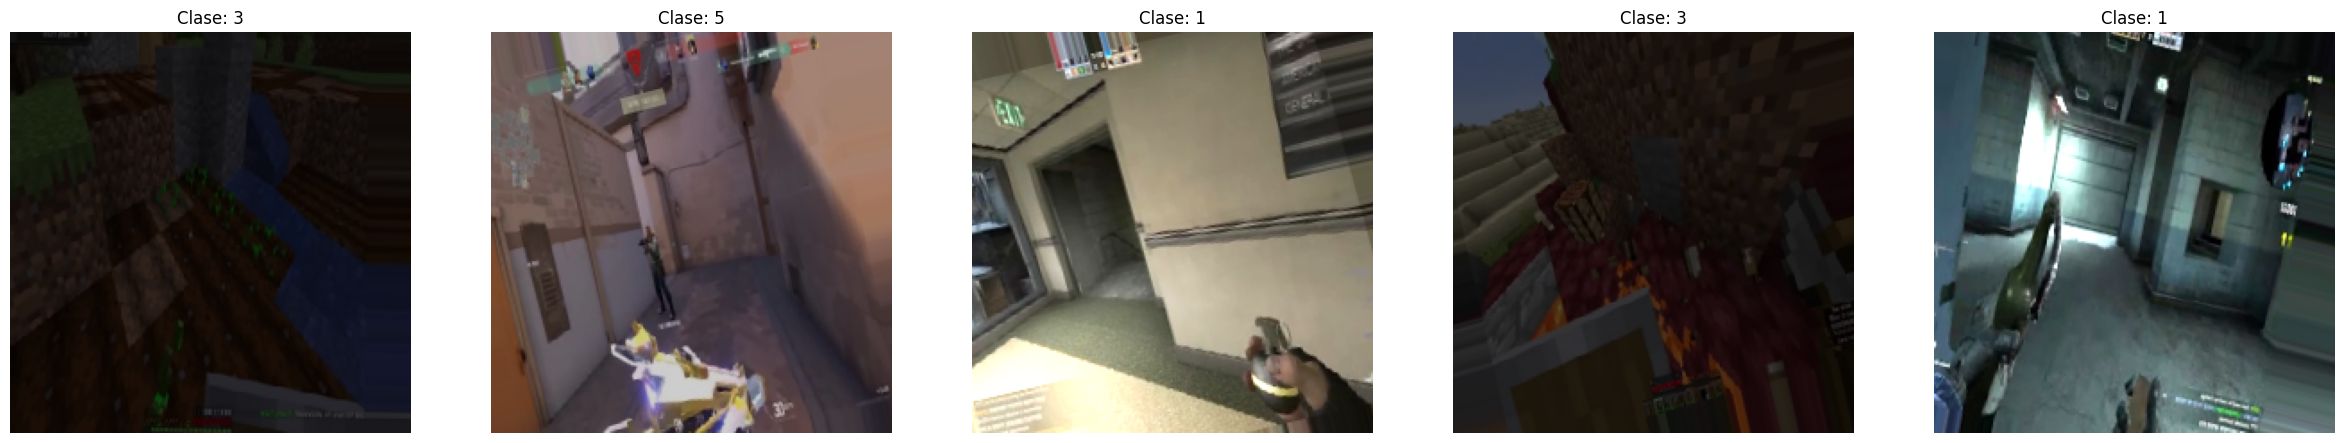

In [21]:
# Visualizar imágenes del primer batch
f, axarr = plt.subplots(1, 5, figsize=(30, 8))
images, labels = train_generator[0]

for i in range(5):
    axarr[i].imshow(images[i])
    axarr[i].set_title(f"Clase: {tf.argmax(labels[i]).numpy()}")
    axarr[i].axis("off")
plt.show()

#  Arquitectura CNN


In [22]:
model = models.Sequential([
    
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),

    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

   
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

   
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),                 
    layers.Dense(6, activation='softmax') 
])


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.3803 - loss: 1.5995 - val_accuracy: 0.6380 - val_loss: 1.0322
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.7768 - loss: 0.6890 - val_accuracy: 0.8281 - val_loss: 0.5878
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8516 - loss: 0.4724 - val_accuracy: 0.8213 - val_loss: 0.6457
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.8791 - loss: 0.3757 - val_accuracy: 0.7919 - val_loss: 0.6587
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8919 - loss: 0.3224 - val_accuracy: 0.9050 - val_loss: 0.2888
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 299s 2s/step - accuracy: 0.9287 - loss: 0.2102 - val_accuracy: 0.9231 - val_loss: 0.2840
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.9412 - loss: 0.1796 - val_accuracy: 0.9299 - val_loss: 0.3142
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 517s 4s/step - accuracy: 0.9446 - loss: 0.1638 - val_accu

In [25]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Accuracy en test: {test_acc}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 16s 534ms/step - accuracy: 0.9793 - loss: 0.1828
Accuracy en test: 0.9534391760826111


                precision    recall  f1-score   support

  Clash-Royale       0.89      1.00      0.94       161
Counter-Strike       0.94      1.00      0.97       154
DeadbyDaylight       0.95      1.00      0.98       157
     Minecraft       1.00      0.88      0.94       157
     Overwatch       0.97      0.91      0.94       151
      Valorant       0.97      0.93      0.95       165

      accuracy                           0.95       945
     macro avg       0.96      0.95      0.95       945
  weighted avg       0.96      0.95      0.95       945



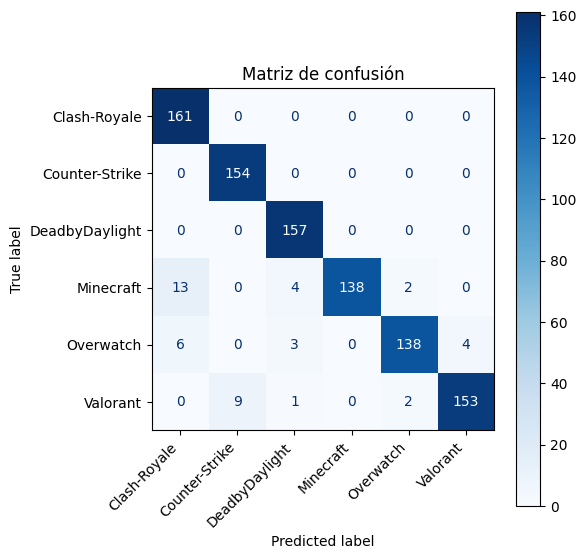

In [26]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = test_generator.classes
y_pred = np.argmax(model.predict(test_generator, verbose=0), axis=1)
labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

plt.figure(figsize=(6, 6))
disp.plot(include_values=True, cmap=plt.cm.Blues, ax=plt.gca(), colorbar=True)
plt.title("Matriz de confusión")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [27]:
import json
json.dump(train_generator.class_indices, open('class_indices.json', 'w'))
model.save('model2.keras')


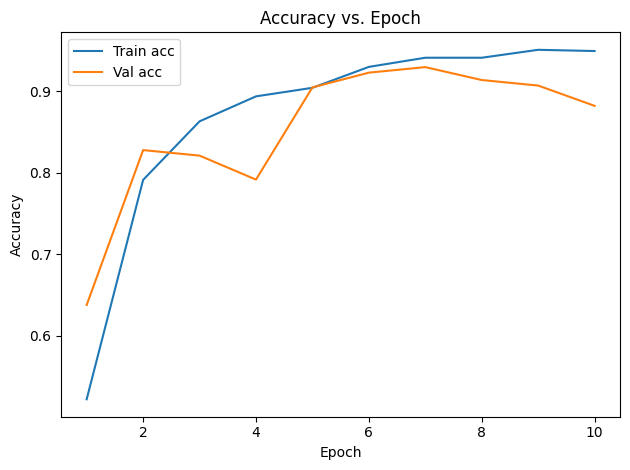

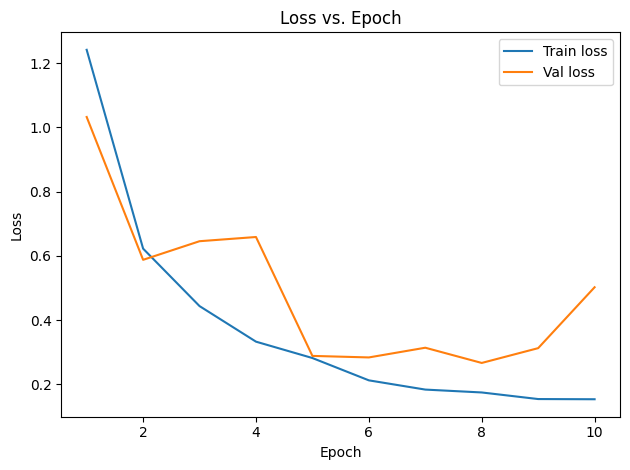

In [28]:
import matplotlib.pyplot as plt

# Graficar la historia del entrenamiento
acc  = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

# ---- Accuracy vs. Epoch----
plt.figure()
plt.plot(epochs, acc,     label="Train acc")
plt.plot(epochs, val_acc, label="Val acc")
plt.title("Accuracy vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend()
plt.tight_layout()
plt.show()

# ---- Loss vs. Epoch ----
plt.figure()
plt.plot(epochs, loss,     label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss vs. Epoch")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout()
plt.show()


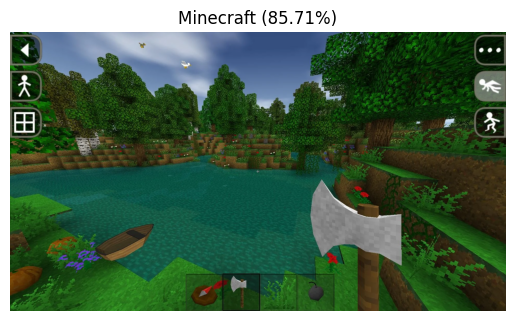

In [43]:
import json, numpy as np, tensorflow as tf
from pathlib import Path
import matplotlib.pyplot as plt

# --- 1. Carga del modelo y diccionario de clases ----------------------------
model_path   = Path("model.keras")                
classes_path = Path("class_indices.json")

model = tf.keras.models.load_model(model_path)
idx2class = {v: k for k, v in json.load(classes_path.open()).items()}

# --- 2. Función auxiliar para pre-procesar y predecir ------------------------
def predict_image(img_path):

    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    x   = tf.keras.utils.img_to_array(img) / 255.0   
    x   = np.expand_dims(x, 0)                       

    preds = model.predict(x, verbose=0)
    class_id = int(np.argmax(preds))
    conf     = float(np.max(preds))

    return idx2class[class_id], conf, preds[0]

# --- 3. Elegir una imagen local ---------------------------------------------
img_path = Path("imagenes_prueba/image_test_3.png")     
#img_path = Path("imagenes_prueba/1 (4).jpg")     

assert img_path.exists(), f"No se encontró {img_path}"

predicted_class, confidence, prob_vector = predict_image(img_path)

# --- 4. Mostrar resultado ----------------------------------------------------
plt.imshow(tf.keras.utils.load_img(img_path))
plt.axis("off")
plt.title(f"{predicted_class} ({confidence:.2%})")
plt.show()
